In [1]:
# This notebook explores the results for the agent based model

In [2]:
import re
import json
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option( 'display.max_columns', None )
pd.set_option( 'display.max_rows', None )

# Loading localidades GeoJSON for reference

In [4]:
localidades = gpd.read_file( './data/geo/bogotá/localidades_no_sumapaz.json' )

In [5]:
del localidades[ 'geometry' ]

In [6]:
localidades.head()

,localidad,codigo_localidad
0,Antonio Nariño,15
1,Tunjuelito,6
2,Rafael Uribe Uribe,18
3,La Candelaria,17
4,Barrios Unidos,12


In [7]:
locs = {}
for i, row in localidades.iterrows():
    locs[ str( row[ 'codigo_localidad' ] ) ] = row[ 'localidad' ]
locs

{'15': 'Antonio Nariño',
 '6': 'Tunjuelito',
 '18': 'Rafael Uribe Uribe',
 '17': 'La Candelaria',
 '12': 'Barrios Unidos',
 '13': 'Teusaquillo',
 '16': 'Puente Aranda',
 '14': 'Los Mártires',
 '1': 'Usaquén',
 '2': 'Chapinero',
 '3': 'Santa Fé',
 '4': 'San Cristóbal',
 '5': 'Usme',
 '19': 'Ciudad Bolívar',
 '7': 'Bosa',
 '8': 'Kennedy',
 '9': 'Fontibón',
 '10': 'Engativá',
 '11': 'Suba'}

# Loading ABM results

In [8]:
agents = pd.read_csv( './data/agents/70_smpl_gral_220_0_pb.csv' )

In [9]:
agents.shape

(150, 27)

In [10]:
agents.dtypes

Unnamed: 0                       int64
Susceptibles                     int64
Total infectados                 int64
Graves                           int64
Críticos                         int64
Leves                            int64
Recuperados                      int64
Rt                             float64
Recuento_zonas                  object
0-4                             object
5-19                            object
20-39                           object
40-59                           object
>60                             object
En_cuarentena                   object
Vivos                            int64
Día                              int64
Contactos_prom_trabajo         float64
Contactos_prom_transporte      float64
Contactos_prom_casa            float64
Nuevos_infectados                int64
Detectados                       int64
En_testing                       int64
En_cama                          int64
En_UCI                           int64
Detectados_por_intervenci

In [11]:
agents[ 'Fecha' ] = agents[ 'Día' ].apply( lambda x: pd.to_datetime( '03/06/2020' ) + pd.DateOffset( days = x ) )

In [12]:
agents.tail()

,Unnamed: 0,Susceptibles,Total infectados,Graves,Críticos,Leves,Recuperados,Rt,Recuento_zonas,0-4,5-19,20-39,40-59,>60,En_cuarentena,Vivos,Día,Contactos_prom_trabajo,Contactos_prom_transporte,Contactos_prom_casa,Nuevos_infectados,Detectados,En_testing,En_cama,En_UCI,Detectados_por_intervencion,#Intervenidos,Fecha
145,145,5023,2570,144,27,2399,37552,0.252918,"{4: [283, 0, 0, 460, 12, 0, 17, 0, 13, 1, 0, 1...","[314, 0, 0, 126, 3, 0, 0, 0, 0, 0, 0, 0, 2126,...","[1198, 0, 0, 519, 25, 0, 0, 0, 0, 0, 0, 0, 762...","[1812, 0, 0, 856, 32, 0, 25, 0, 18, 3, 0, 3, 1...","[1109, 0, 0, 595, 15, 0, 54, 0, 49, 9, 0, 9, 9...","[590, 0, 0, 303, 12, 0, 65, 0, 51, 15, 0, 15, ...","[1643, 731, 129, 27, 11480]",45145,145,4.982811,9.192823,5.010544,87,540,26,38,6,0,0,2020-07-29
146,146,4951,2348,140,25,2183,37845,0.248722,"{4: [273, 0, 0, 415, 9, 0, 18, 0, 12, 2, 0, 2,...","[308, 0, 0, 117, 6, 0, 0, 0, 0, 0, 0, 0, 2141,...","[1184, 0, 0, 480, 18, 0, 0, 0, 0, 0, 0, 0, 767...","[1793, 0, 0, 769, 22, 0, 25, 0, 20, 3, 0, 3, 1...","[1087, 0, 0, 553, 24, 0, 53, 0, 48, 8, 0, 8, 9...","[579, 0, 0, 264, 14, 0, 62, 0, 48, 14, 0, 14, ...","[1620, 671, 125, 25, 11571]",45144,146,4.979466,9.198565,5.022882,84,546,24,38,6,0,0,2020-07-30
147,147,4868,2163,136,26,2001,38112,0.251503,"{4: [263, 0, 0, 375, 9, 0, 20, 0, 14, 2, 0, 2,...","[300, 0, 0, 118, 7, 0, 0, 0, 0, 0, 0, 0, 2148,...","[1168, 0, 0, 429, 14, 0, 0, 0, 0, 0, 0, 0, 774...","[1759, 0, 0, 707, 25, 0, 23, 0, 21, 3, 0, 3, 1...","[1069, 0, 0, 501, 14, 0, 52, 0, 48, 8, 0, 8, 9...","[572, 0, 0, 246, 11, 0, 61, 0, 51, 15, 0, 15, ...","[1593, 622, 127, 26, 11650]",45143,147,4.994794,9.197904,5.020513,71,557,16,38,6,0,0,2020-07-31
148,148,4796,1999,124,23,1852,38346,0.248124,"{4: [250, 0, 0, 334, 11, 0, 19, 0, 13, 2, 0, 2...","[298, 0, 0, 106, 5, 0, 0, 0, 0, 0, 0, 0, 2162,...","[1152, 0, 0, 399, 16, 0, 0, 0, 0, 0, 0, 0, 778...","[1728, 0, 0, 655, 38, 0, 21, 0, 19, 3, 0, 3, 1...","[1052, 0, 0, 466, 23, 0, 48, 0, 43, 6, 0, 6, 9...","[566, 0, 0, 226, 6, 0, 55, 0, 45, 14, 0, 14, 5...","[1575, 572, 113, 23, 11735]",45141,148,4.984227,9.188919,5.014178,88,559,17,38,6,0,0,2020-08-01
149,149,4732,1840,118,21,1701,38567,0.255435,"{4: [242, 0, 0, 296, 9, 0, 21, 0, 14, 2, 0, 2,...","[295, 0, 0, 102, 1, 0, 0, 0, 0, 0, 0, 0, 2169,...","[1140, 0, 0, 359, 17, 0, 0, 0, 0, 0, 0, 0, 784...","[1701, 0, 0, 606, 26, 0, 21, 0, 21, 3, 0, 3, 1...","[1039, 0, 0, 424, 13, 0, 47, 0, 38, 6, 0, 6, 9...","[557, 0, 0, 210, 3, 0, 50, 0, 41, 12, 0, 12, 5...","[1559, 522, 105, 21, 11810]",45139,149,4.987262,9.181417,5.022530,60,560,18,38,6,0,0,2020-08-02


# Bogotá

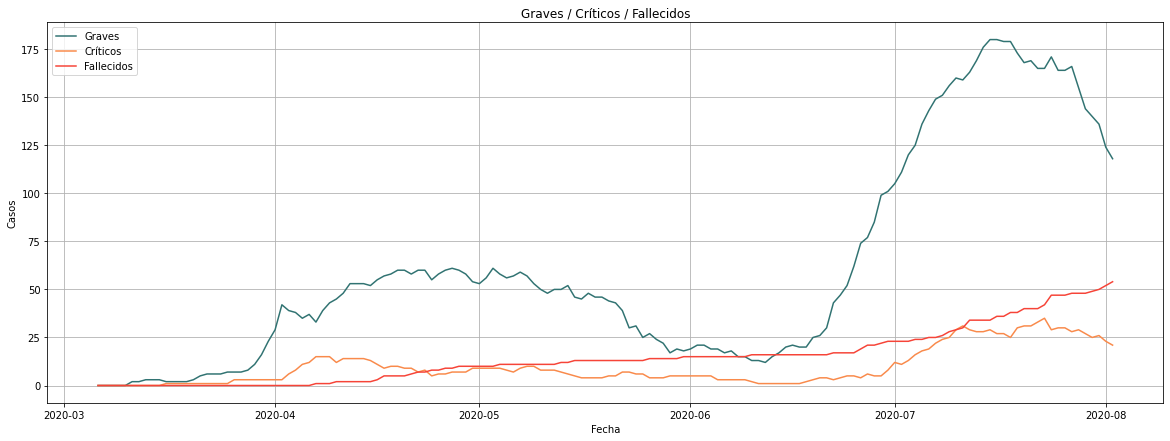

In [13]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], agents[ 'Graves' ], label = 'Graves', color = '#317372' )
plt.plot( agents[ 'Fecha' ], agents[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
plt.plot( agents[ 'Fecha' ], ( 45193 - agents[ 'Vivos' ] ), label = 'Fallecidos', color = '#f64438' )
plt.title( 'Graves / Críticos / Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

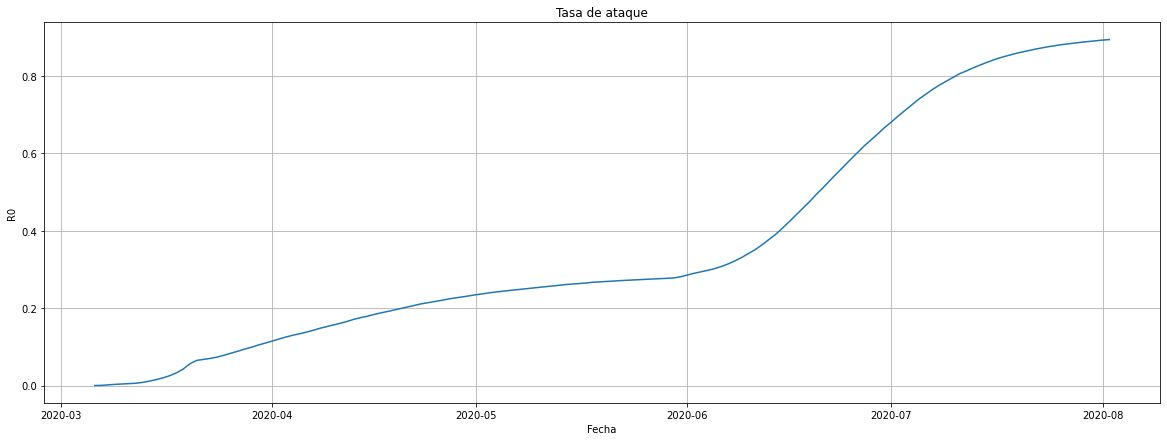

In [14]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], ( agents[ 'Nuevos_infectados' ].cumsum() / 45193 ) )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.title( 'Tasa de ataque' )
plt.grid( True )

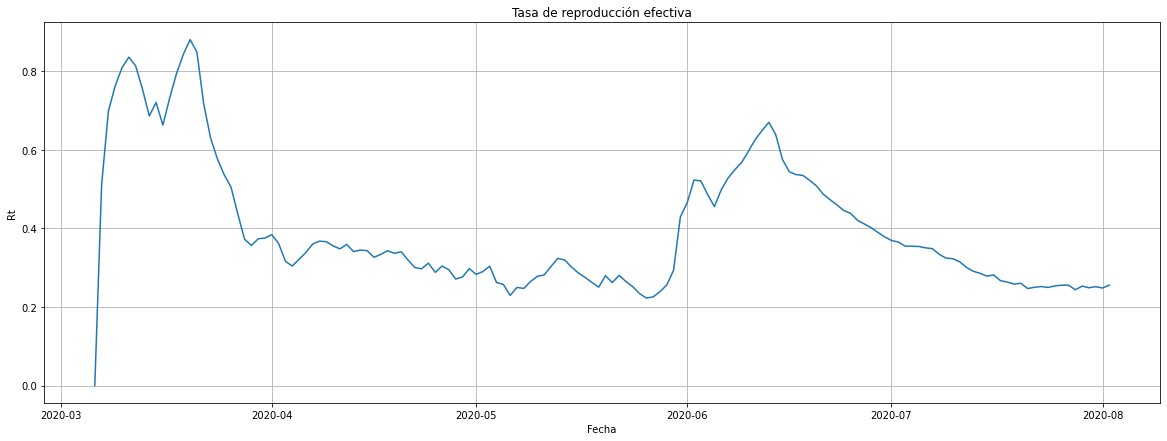

In [15]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], agents[ 'Rt' ] )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.title( 'Tasa de reproducción efectiva' )
plt.grid( True )

In [16]:
def sum_quarantine( x ):
    x = json.loads( x )
    total_people = x[ 0 ] + x[ 1 ] + x[ 2 ] + x[ 3 ] + x[ 4 ]
    return total_people / 45145

agents[ 'Cuarentena' ] = agents[ 'En_cuarentena' ].apply( sum_quarantine )

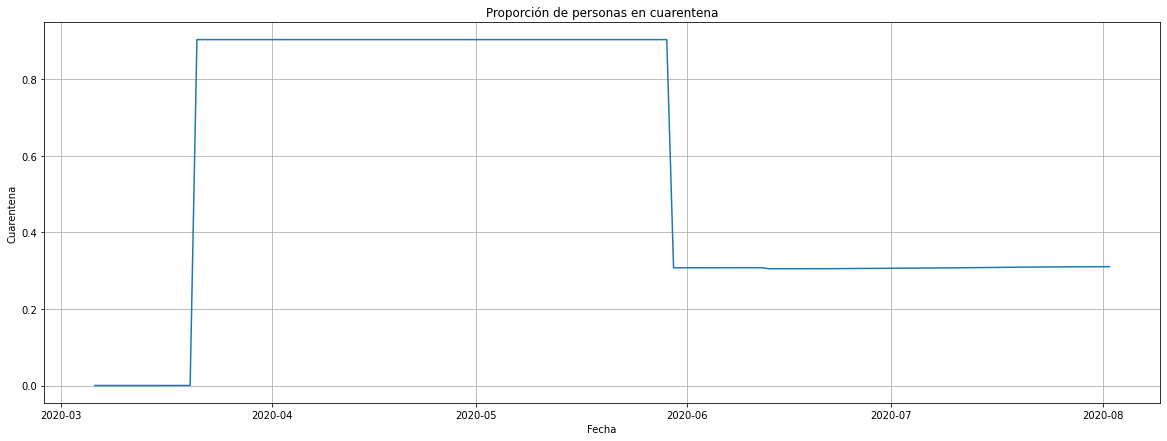

In [17]:
plt.figure( figsize = ( 20, 7 ) )
plt.plot( agents[ 'Fecha' ], agents[ 'Cuarentena' ] )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Cuarentena' )
plt.title( 'Proporción de personas en cuarentena' )
plt.grid( True )

In [18]:
agents[ 'Fallecidos' ] = ( 45193 - agents[ 'Vivos' ] ) / 45193
agents[ 'R0' ] = ( agents[ 'Nuevos_infectados' ].cumsum() / 45193 )

In [19]:
agents[ 'Críticos' ] = agents[ 'Críticos' ] / 45193
agents[ 'Graves' ] = agents[ 'Graves' ] / 45193

In [20]:
agents[ [ 'Fecha', 'R0', 'Rt', 'Cuarentena' ] ].to_csv( './agents-viz/data/agents.csv', index = False )

In [21]:
pd.melt( agents[ [ 'Fecha', 'Graves', 'Críticos', 'Fallecidos', 'Cuarentena' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/agents2.csv', index = False )

# By localidades

In [22]:
recuento_zonas = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [23]:
def expand_by_loc( x ):
    replacer = re.compile("(\d+)")
    x[ 'Recuento_zonas' ] = replacer.sub( r'"\1"', x[ 'Recuento_zonas' ] )
    x[ 'Recuento_zonas' ] = json.loads( x[ 'Recuento_zonas' ] )
    ds = []
    for z in x[ 'Recuento_zonas' ].keys():
        d = dict()
        d[ 'Localidad' ] = locs[ z ]
        d[ 'Día' ] = row[ 'Día' ]
        for i in recuento_zonas.keys():
            d[ recuento_zonas[ i ] ] = int( x[ 'Recuento_zonas' ][ z ][ i ] )
        ds.append( d )
    return ds

all_locs = []
for i, row in agents.iterrows():
    all_locs = all_locs + expand_by_loc( row )

all_locs = pd.DataFrame( all_locs )

In [24]:
all_locs[ 'Fecha' ] = all_locs[ 'Día' ].apply( lambda x: pd.to_datetime( '03/06/2020' ) + pd.DateOffset( days = x ) )

In [25]:
all_locs.loc[ all_locs[ 'Localidad' ] == 'Kennedy' ].head()

,Localidad,Día,Susceptibles,?_1,?_2,Leves,?_4,?_5,Graves,?_7,?_8,Críticos,?_10,?_11,Recuperados,?_13,?_14,Fecha
9,Kennedy,0,6148,0,0,7,0,0,0,0,0,0,0,0,0,0,0,2020-03-06
28,Kennedy,1,6134,0,0,21,5,0,0,0,0,0,0,0,0,0,0,2020-03-07
47,Kennedy,2,6126,0,0,29,10,0,0,0,0,0,0,0,0,0,0,2020-03-08
66,Kennedy,3,6114,0,0,41,16,0,0,0,0,0,0,0,0,0,0,2020-03-09
85,Kennedy,4,6105,0,0,50,6,0,0,0,0,0,0,0,0,0,0,2020-03-10


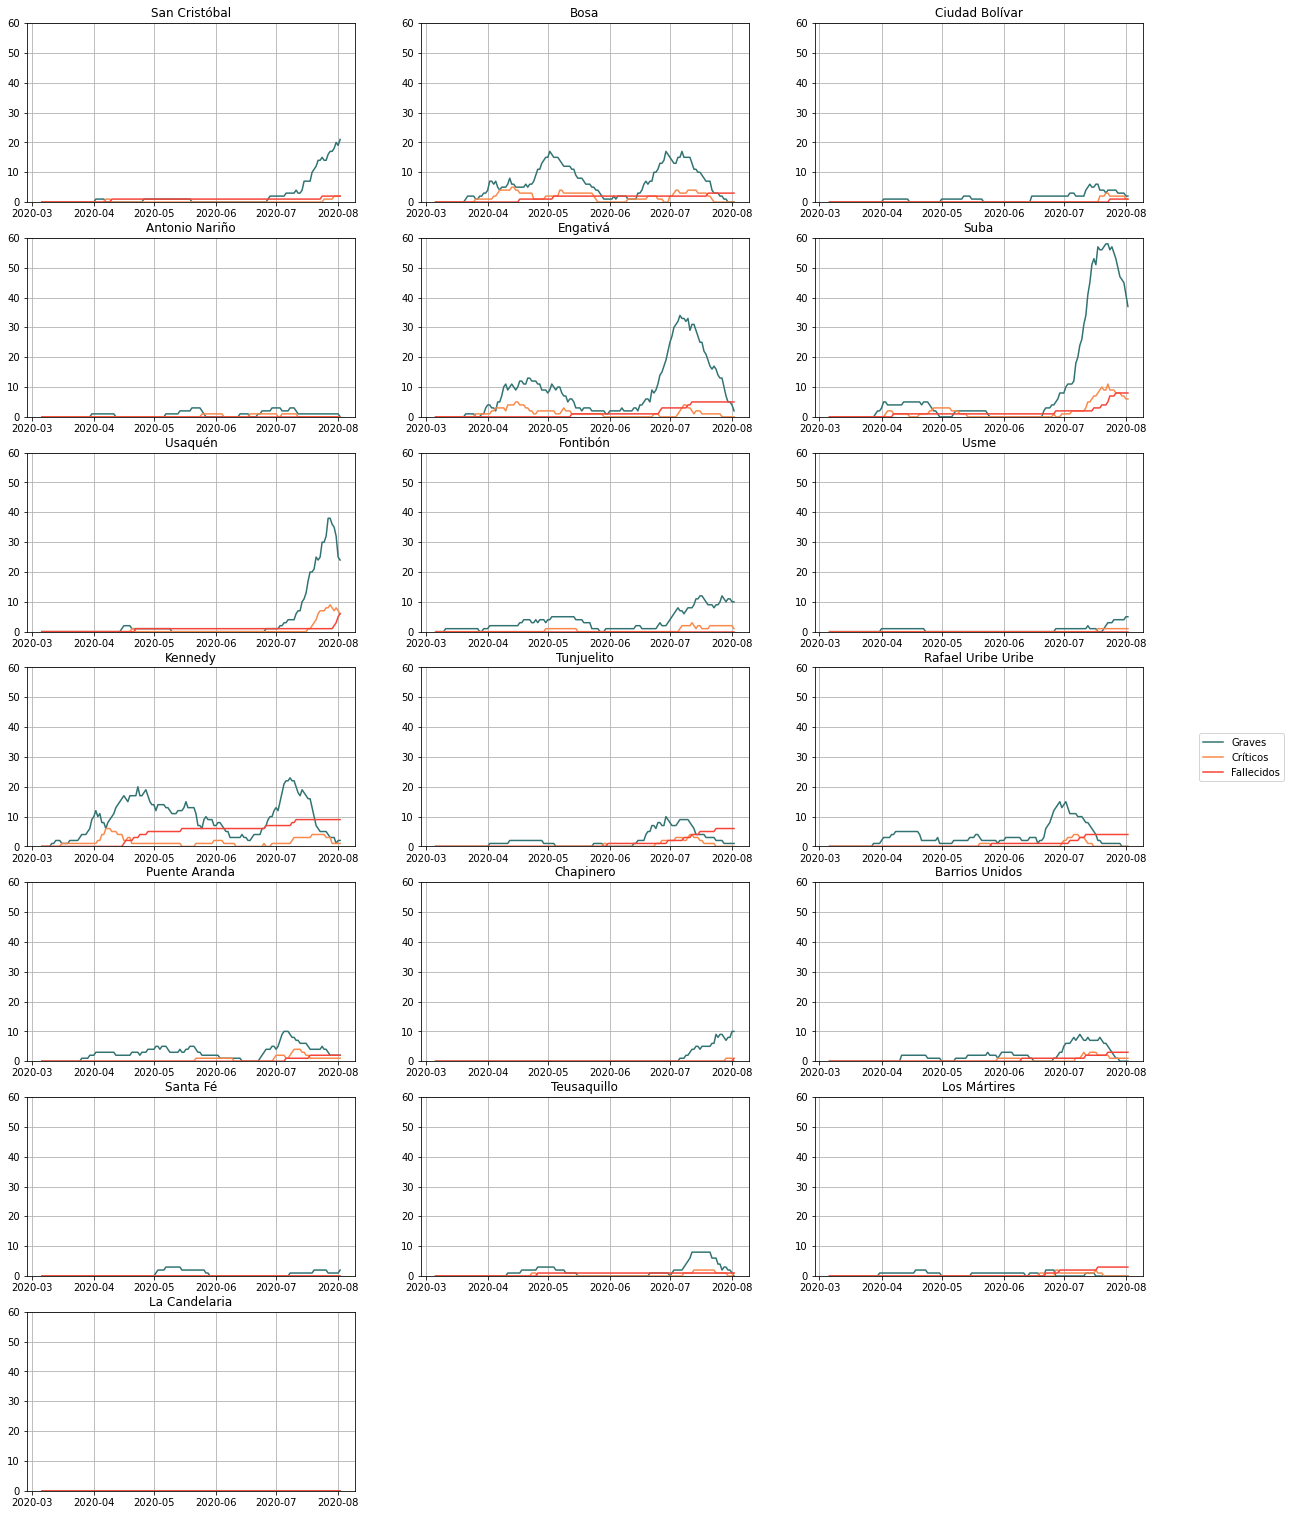

In [26]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 27 ) )

for i in range( 1, len( locs ) + 1 ):
    current_loc = all_locs[ all_locs[ 'Localidad' ] == locs[ i - 1 ] ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 7, 3, i )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Graves' ], label = 'Graves', color = '#317372' )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
    plt.plot( current_loc[ 'Fecha' ], ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ), label = 'Fallecidos', color = '#f64438' )
    plt.title( locs[ i - 1 ] )
    plt.ylim( [ 0, 60 ] )
    plt.grid( True )

fig.legend( labels = [ 'Graves', 'Críticos', 'Fallecidos' ], loc = 'center right' )

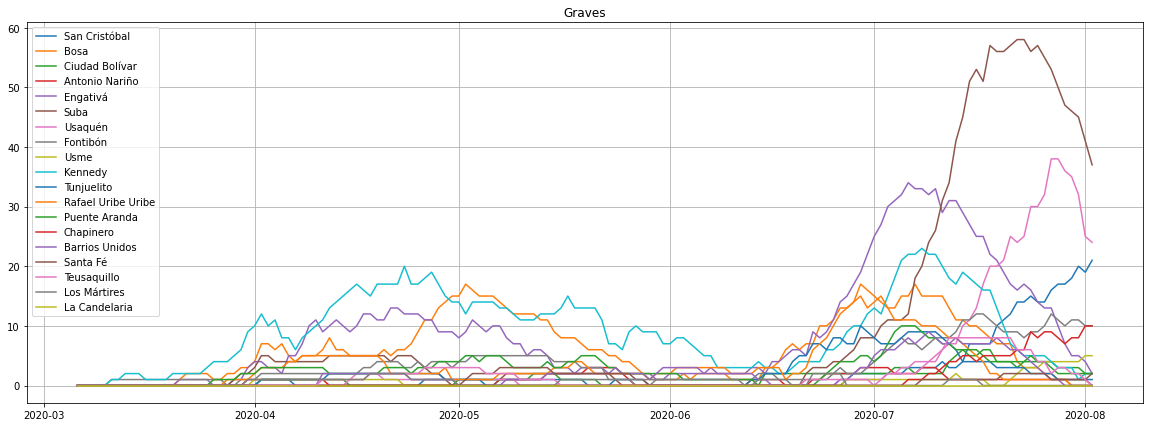

In [27]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Graves' ], label = loc )
plt.title( 'Graves' )
plt.grid( True )
plt.legend()

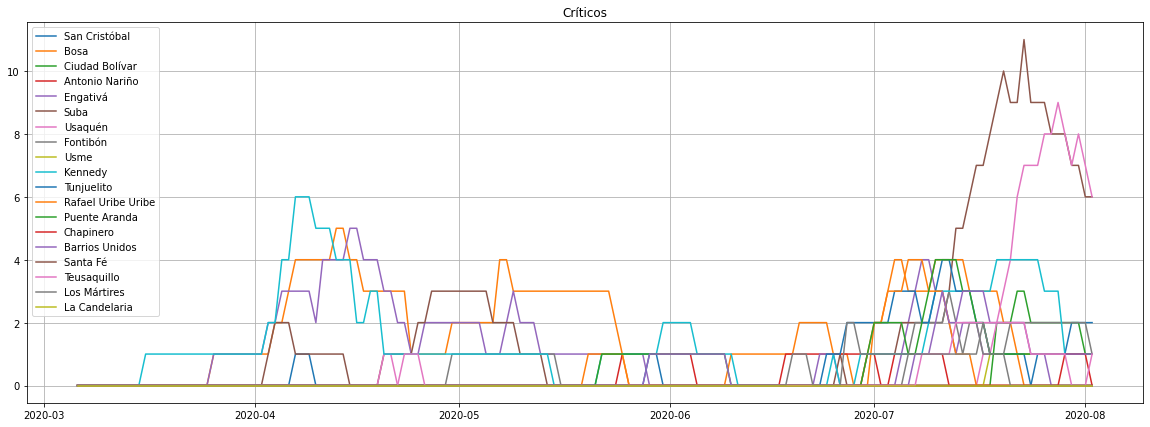

In [28]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    plt.plot( current_loc[ 'Fecha' ], current_loc[ 'Críticos' ], label = loc )
plt.title( 'Críticos' )
plt.grid( True )
plt.legend()

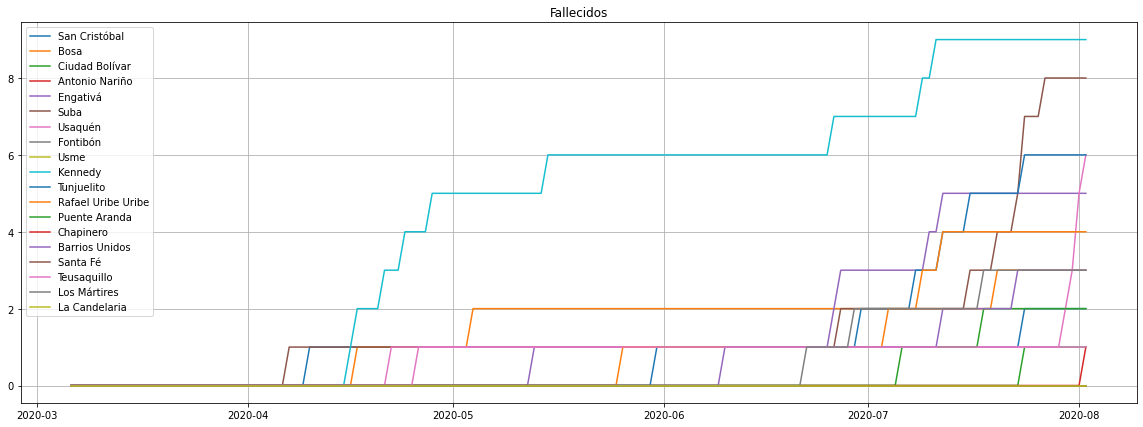

In [29]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 7 ) )
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.plot( current_loc[ 'Fecha' ], ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ), label = loc )
plt.title( 'Fallecidos' )
plt.grid( True )
plt.legend()

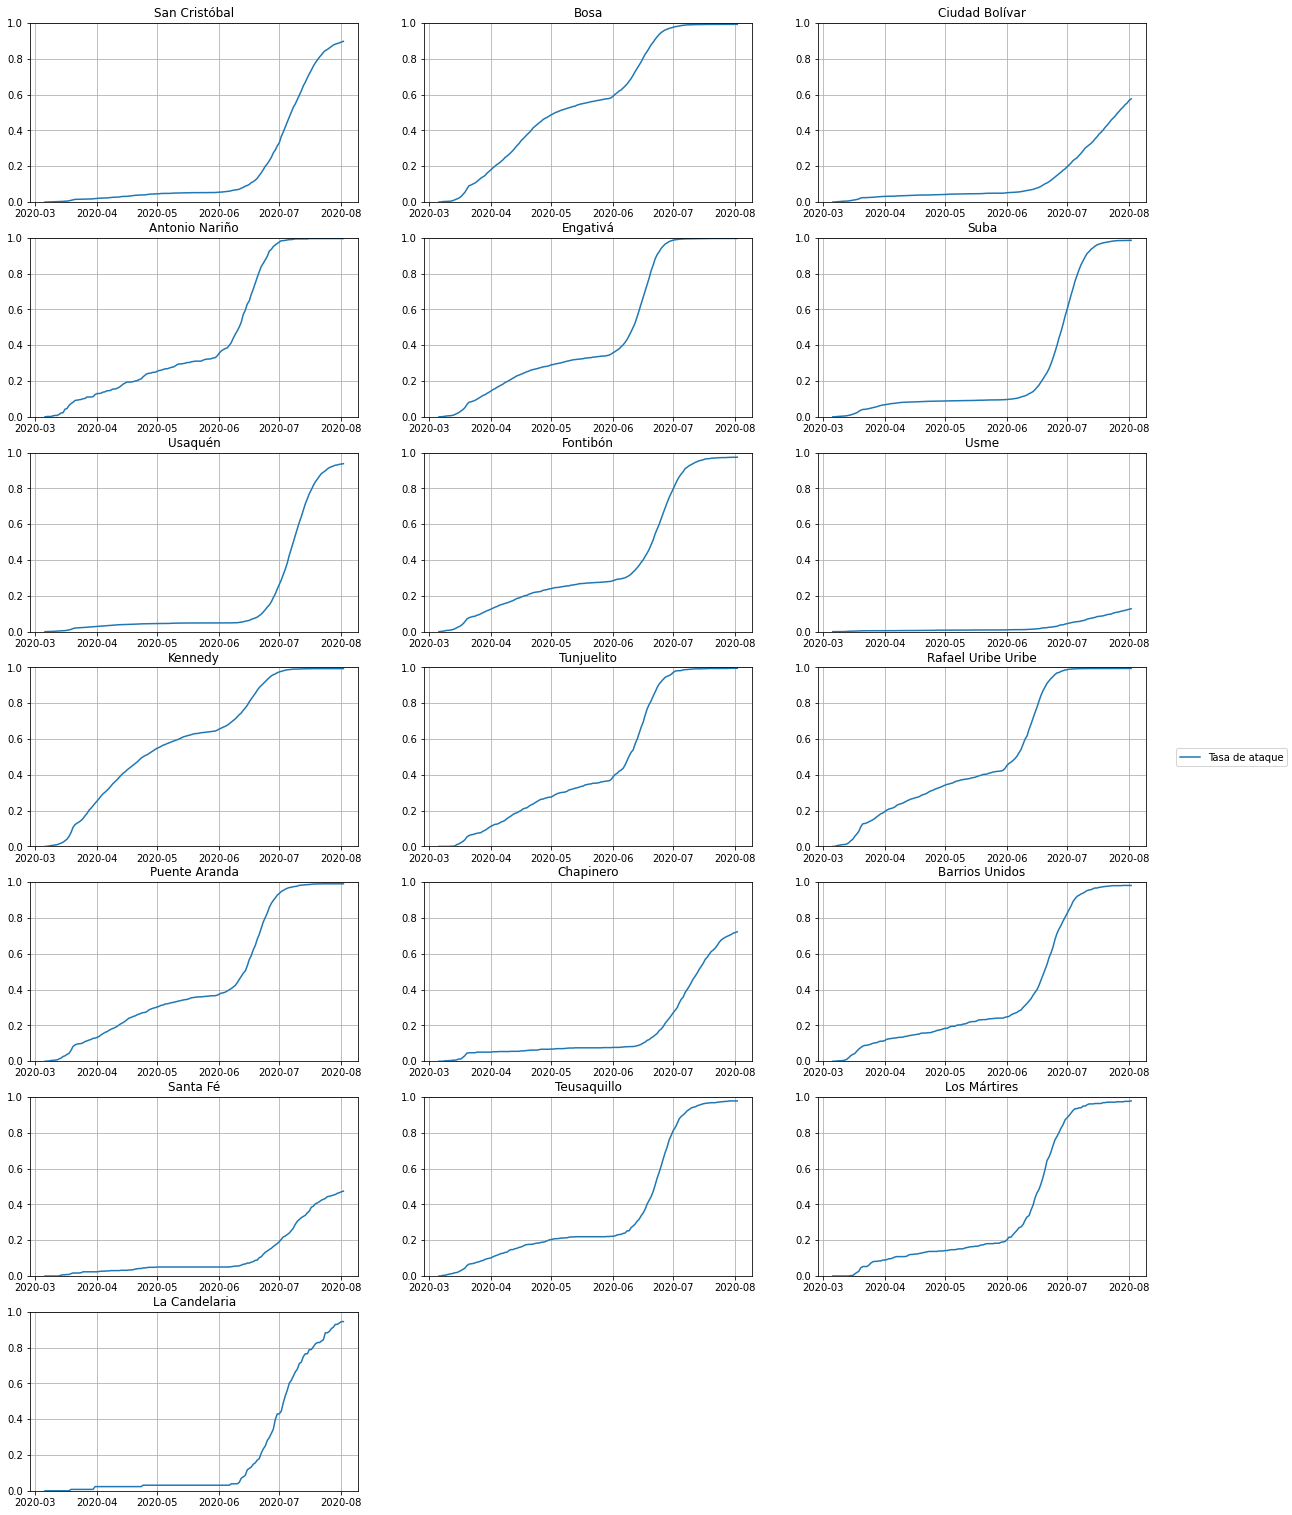

In [30]:
locs = list( all_locs[ 'Localidad' ].unique() )

fig = plt.figure( figsize = ( 20, 27 ) )

for i in range( 1, len( locs ) + 1 ):
    current_loc = all_locs[ all_locs[ 'Localidad' ] == locs[ i - 1 ] ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 7, 3, i )
    plt.plot( current_loc[ 'Fecha' ], current_loc[ '?_4' ].cumsum() / pop, label = 'Tasa de ataque' )
    plt.title( locs[ i - 1 ] )
    plt.ylim( [ 0, 1.0 ] )
    plt.grid( True )

fig.legend( labels = [ 'Tasa de ataque' ], loc = 'center right' )

In [31]:
locs = list( all_locs[ 'Localidad' ].unique() )

agents_locs = []
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    
    current_loc[ 'Fallecidos' ] = ( pop - ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ) ) / pop
    current_loc[ 'Graves' ] = current_loc[ 'Graves' ] / pop
    current_loc[ 'Críticos' ] = current_loc[ 'Críticos' ] / pop
    
    
    current_loc = pd.melt( current_loc[ [ 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] )
    current_loc[ 'Localidad' ] = loc
    agents_locs.append( current_loc )
    
pd.concat( agents_locs ).to_csv( './agents-viz/data/agents-locs2.csv', index = False )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [34]:
locs = list( all_locs[ 'Localidad' ].unique() )

agents_locs = []
for loc in locs:
    current_loc = all_locs[ all_locs[ 'Localidad' ] == loc ]
    pop = ( current_loc[ 'Susceptibles' ] + current_loc[ 'Leves' ] + current_loc[ 'Graves' ] + current_loc[ 'Críticos' ] + current_loc[ 'Recuperados' ] ).values[ 0 ]
    
    current_loc[ 'R0' ] = current_loc[ '?_4' ].cumsum() / pop
    current_loc[ 'Localidad' ] = loc
    agents_locs.append( current_loc[ [ 'Fecha', 'Localidad', 'R0' ] ] )
    
pd.concat( agents_locs ).to_csv( './agents-viz/data/agents-locs.csv', index = False )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# By age groups

In [ ]:
grupo_edad = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [ ]:
def expand_by_age( x ):
    ds = []
    for a in [ '0-4', '5-19', '20-39', '40-59', '>60' ]:
        x[ a ] = json.loads( x[ a ] )
        d = dict()
        d[ 'Grupo de edad' ] = a
        d[ 'Día' ] = row[ 'Día' ]
        for i in range( 15 ):
            d[ grupo_edad[ i ] ] = x[ a ][ i ]
        ds.append( d )
    return ds

all_ages = []
for i, row in agents.iterrows():
    all_ages = all_ages + expand_by_age( row )

all_ages = pd.DataFrame( all_ages )

In [ ]:
all_ages[ 'Fecha' ] = all_ages[ 'Día' ].apply( lambda x: pd.to_datetime( '03/01/2020' ) + pd.DateOffset( days = x ) )

In [ ]:
all_ages.tail()

In [ ]:
ages = list( all_ages[ 'Grupo de edad' ].unique() )

fig = plt.figure( figsize = ( 20, 8 ) )

for i in range( 1, len( ages ) + 1 ):
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == ages[ i - 1 ] ]
    plt.subplot( 2, 3, i )
    plt.plot( current_age[ 'Fecha' ], current_age[ 'Graves' ], label = 'Graves', color = '#317372' )
    plt.plot( current_age[ 'Fecha' ], current_age[ 'Críticos' ], label = 'Críticos', color = '#f98a4b' )
    plt.plot( current_age[ 'Fecha' ], ( pop - ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ) ), label = 'Fallecidos', color = '#f64438' )
    plt.title( ages[ i - 1 ] )
    plt.ylim( [ 0, 90 ] )
    plt.grid( True )

fig.legend( labels = [ 'Graves', 'Críticos', 'Fallecidos' ], loc = 'center right' )

In [ ]:
ages = list( all_ages[ 'Grupo de edad' ].unique() )

fig = plt.figure( figsize = ( 20, 8 ) )

for i in range( 1, len( ages ) + 1 ):
    current_age = all_ages[ all_ages[ 'Grupo de edad' ] == ages[ i - 1 ] ]
    pop = ( current_age[ 'Susceptibles' ] + current_age[ 'Leves' ] + current_age[ 'Graves' ] + current_age[ 'Críticos' ] + current_age[ 'Recuperados' ] ).values[ 0 ]
    plt.subplot( 2, 3, i )
    plt.plot( current_age[ 'Fecha' ], current_age[ '?_4' ].cumsum() / pop, label = 'Tasa de ataque' )
    plt.title( ages[ i - 1 ] )
    plt.ylim( [ 0, 1 ] )
    plt.grid( True )

fig.legend( labels = [ 'Tasa de ataque' ], loc = 'center right' )

In [ ]:
quarentenas = { 0: 'Susceptibles', 1: 'Leves', 2: 'Graves', 3: 'Críticos', 4: 'Recuperados'  }

In [ ]:
def expand_by_quarintine( x ):
    ds = []
    x[ 'En_cuarentena' ] = json.loads( x[ 'En_cuarentena' ] )
    d = dict()
    d[ 'Día' ] = row[ 'Día' ]
    for i in range( 5 ):
        d[ quarentenas[ i ] ] = x[ 'En_cuarentena' ][ i ]
    ds.append( d )
    return ds

all_quarintines = []
for i, row in agents.iterrows():
    all_quarintines = all_quarintines + expand_by_quarintine( row )

all_quarintines = pd.DataFrame( all_quarintines )

In [ ]:
all_quarintines.tail()

In [ ]:
plt.plot( all_quarintines[ 'Día' ], ( all_quarintines[ 'Susceptibles' ] + all_quarintines[ 'Recuperados' ] + all_quarintines[ 'Leves' ] + all_quarintines[ 'Graves' ] + all_quarintines[ 'Críticos' ] ) )

In [ ]:
del agents[ 'Recuento_zonas' ]
del agents[ '0-4' ]
del agents[ '5-19' ]
del agents[ '20-39' ]
del agents[ '40-59' ]
del agents[ '>60' ]
del agents[ 'En_cuarentena' ]

In [ ]:
agents.tail()

In [ ]:
agents.dtypes

In [ ]:
agents.to_csv( './data/agents/agents_bogota.csv', index = False )